# Curve Fitting
The [Michaelis-Menten](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics) model of enzyme kinetics describes how an enzymes rate of reaction changes with substrate concentration and provides useful constants, namely $k_m$  that summarises the activity level of the enzyme.

In this notebook we'll download some (synthetic) enzyme kinetics data and fit a line to the data accoring to the equation:
$$v = V_{max} \times \frac{[S]}{k_m + [S]}$$

* where $v$ is the rate of reaction (velocity), dependent variable (y)
* $[S]$ is the substrate concentration, independent variable (x)
* $V_{max}$ is the maimum possible rate of reaction - constant 
* $k_m$ is the Michaelis constant - inverse of enzyme:substrate affinity - constant

By varying $k_m$ and $V_{max}$  we can adjust the curve so that it fits our data. We will use an optimisation algorithm from ```scipy.optimise``` to fit the curve, then measure the fit with the $r^2$ score.

In [1]:
import os
import pandas as pd

kinetics_data = [i for i in os.listdir('../tutorial-data/curve-fitting') if 'Enzyme' in i]


kinetics_csvs = [i for i in kinetics_data if 'csv' in i]
kinetics_excels = [i for i in kinetics_data if 'xlsx' in i]

first_file_path = os.path.join('../tutorial-data/curve-fitting', kinetics_csvs[0])
print(f'First file: \t {first_file_path}')


data = pd.read_csv(first_file_path, index_col =0)
data

First file: 	 ../tutorial-data/curve-fitting/Enzyme-vmax=4.08-km=31.71.csv


,[Substrate]/µM,Reaction Rate
0,0.000000,-0.030798
1,7.142857,0.813815
2,14.285714,1.273770
3,21.428571,1.762318
4,28.571429,1.903437
5,35.714286,2.094922
6,42.857143,2.220173
7,50.000000,2.397875
8,57.142857,2.600122
9,64.285714,2.746610


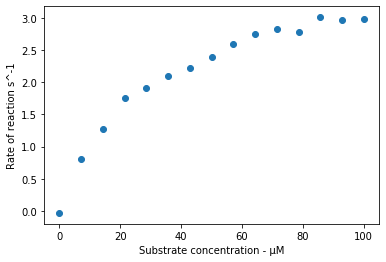

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data['[Substrate]/µM'], data['Reaction Rate'])
plt.ylabel('Rate of reaction s^-1')
plt.xlabel('Substrate concentration - µM')
plt.show()

In [3]:
def michaelis_menten(x,km,vmax):
    return (vmax*x)/(km + x)

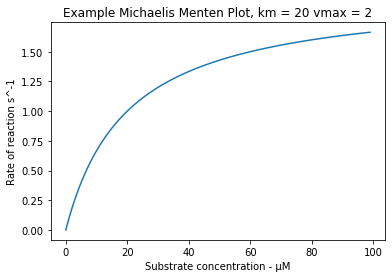

In [4]:
x = list(range(0, 100))

example_km = 20
example_vmax = 2

y = [michaelis_menten(i, example_km, example_vmax) for i in x]

plt.plot(x,y)
plt.title(f'Example Michaelis Menten Plot, km = {example_km} vmax = {example_vmax}')
plt.ylabel('Rate of reaction s^-1')
plt.xlabel('Substrate concentration - µM')
plt.show()

In [5]:
from scipy.optimize import curve_fit

params, covariance = curve_fit(michaelis_menten, data['[Substrate]/µM'], data['Reaction Rate'])

print(f'Km = {params[0]} \t Vmax = {params[1]}')
print()
print(first_file_path)

Km = 29.0517125066596 	 Vmax = 3.895362903247058

../tutorial-data/curve-fitting/Enzyme-vmax=4.08-km=31.71.csv


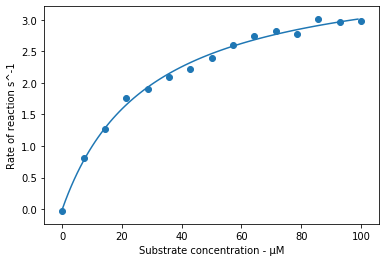

In [6]:
predicted_km = params[0]
predicted_vmax = params[1]

x = list(range(0, 100))
y = [michaelis_menten(i, predicted_km, predicted_vmax) for i in x]

plt.plot(x,y)
plt.scatter(data['[Substrate]/µM'], data['Reaction Rate'])
plt.ylabel('Rate of reaction s^-1')
plt.xlabel('Substrate concentration - µM')
plt.show()

In [7]:
# r squared
# the easy way
from sklearn.metrics import r2_score

# ?r2_score
# Signature: r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')

y_true = data['Reaction Rate']
y_pred = michaelis_menten(data['[Substrate]/µM'], predicted_km, predicted_vmax)

r2_score(y_true=y_true, y_pred=y_pred)

0.9949247487280384

In [8]:
# the hands on way

sum_squares_total = sum((y_true - y_true.mean())**2)
sum_squares_residual = sum((y_true - y_pred)**2)

r_2 = 1 - (sum_squares_residual / sum_squares_total)
r_2

0.9949247487280384

# Exercises

### Function Building
* Define a function that reads one of the enzyme kinetics csvs links and returns the km, vmax and r^2

### Loops
* Use the function you defined to find the km, vmax and r^2 of all csv files provided, using a ```for``` loop

### New Curves
* Look at and plot this dataset: ```https://github.com/UoMMIB/Python-Club/raw/master/Tutorials/../tutorial-data/curve-fitting/FluoresenceRegulation.csv```;

it's a damped sine curve that follows the equation:
 $$y = 1 + \frac{sin(p1 \times x)}{x \times p2}$$


 where $p1$ and $p2$ are parameters to be found.

 * Define a function that gives $y$ from $x$, $p1$ and $p2$ 
 * Use that function and ```scipy.optimize.curve_fit``` to find $p1$ and $p2$ 

